In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn import linear_model,preprocessing
from sklearn.linear_model import LogisticRegression
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [48]:
df = pd.read_csv('all_data_combined.csv')
df.head()

,subject_id,age,urea_n_min,urea_n_max,urea_n_mean,resprate_min,resprate_max,resprate_mean,glucose_min,glucose_max,...,oasis,lods,gender_F,gender_M,marital_status_DIVORCED,marital_status_MARRIED,marital_status_SEPARATED,marital_status_SINGLE,marital_status_WIDOWED,death
0,15057,58.831224,16.0,37.0,26.111111,10.0,52,20.104478,67.0,405.0,...,36.5,5.5,0,1,0,1,0,0,0,1
1,79262,81.618606,10.0,15.0,13.500000,11.0,31,18.704225,119.0,348.0,...,48.0,4.0,0,1,0,1,0,0,0,1
2,77191,79.102744,16.0,56.0,35.500000,20.0,31,25.744681,90.0,188.0,...,35.0,6.0,1,0,1,0,0,0,0,0
3,84966,88.232043,8.0,27.0,17.692308,10.0,51,17.770833,92.0,271.0,...,40.5,4.0,1,0,0,0,0,1,0,1
4,94997,90.000000,38.0,48.0,42.250000,4.0,40,26.360000,62.0,135.0,...,35.0,5.0,1,0,0,0,0,1,0,0


In [49]:
x_data =df.iloc[:,1:df.shape[1]-1]
x_scaled = pd.DataFrame(preprocessing.StandardScaler().fit(x_data).transform(x_data))
x_scaled.columns = x_data.columns
df.iloc[:,1:df.shape[1]-1] = x_scaled
df.head(10)

,subject_id,age,urea_n_min,urea_n_max,urea_n_mean,resprate_min,resprate_max,resprate_mean,glucose_min,glucose_max,...,oasis,lods,gender_F,gender_M,marital_status_DIVORCED,marital_status_MARRIED,marital_status_SEPARATED,marital_status_SINGLE,marital_status_WIDOWED,death
0,15057,-0.427763,-0.057777,-0.039001,-0.005389,-0.089350,2.350555,0.221061,-0.820743,1.875183,...,0.472392,0.469148,-0.879837,0.879837,-0.272742,0.957233,-0.11272,-0.545847,-0.432415,1
1,79262,0.964170,-0.513570,-0.806411,-0.682387,0.180491,-0.087169,-0.167187,0.904299,1.318367,...,1.812103,-0.105944,-0.879837,0.879837,-0.272742,0.957233,-0.11272,-0.545847,-0.432415,1
2,77191,0.810492,-0.057777,0.623763,0.498632,2.609057,-0.087169,1.784921,-0.057744,-0.244627,...,0.297647,0.660846,1.136574,-1.136574,3.666463,-1.044677,-0.11272,-0.545847,-0.432415,0
3,84966,1.368141,-0.665501,-0.387824,-0.457333,-0.089350,2.234473,-0.425988,0.008604,0.566176,...,0.938379,-0.105944,1.136574,-1.136574,-0.272742,-1.044677,-0.11272,1.832014,-0.432415,1
4,94997,1.476134,1.613463,0.344705,0.860990,-1.708394,0.957569,1.955531,-0.986612,-0.762369,...,0.297647,0.277451,1.136574,-1.136574,-0.272742,-1.044677,-0.11272,1.832014,-0.432415,0
5,83430,0.361084,3.588565,3.170172,3.698716,0.180491,-0.435416,-0.582548,-0.090918,-0.381389,...,-0.634325,0.277451,1.136574,-1.136574,-0.272742,-1.044677,-0.11272,1.832014,-0.432415,0
6,12325,-0.447806,-0.893397,-0.492471,-0.837241,-0.359190,-0.667580,-1.244412,-1.351525,0.605251,...,-0.168339,-0.489339,-0.879837,0.879837,-0.272742,0.957233,-0.11272,-0.545847,-0.432415,0
7,93025,1.476134,2.449083,1.042351,1.689974,-0.629031,0.261077,-0.461137,-0.953439,0.243809,...,1.462614,1.427635,-0.879837,0.879837,-0.272742,-1.044677,-0.11272,-0.545847,2.312592,1
8,32138,-1.415304,-1.045328,-1.224999,-1.246056,0.720172,-0.435416,0.151016,-0.489004,-0.752600,...,0.530641,-0.105944,1.136574,-1.136574,-0.272742,-1.044677,-0.11272,1.832014,-0.432415,0
9,2056,0.376310,-0.969363,-0.492471,-0.683554,0.450332,-0.087169,1.067861,1.866341,0.556407,...,-0.284836,0.660846,1.136574,-1.136574,-0.272742,0.957233,-0.11272,-0.545847,-0.432415,0


In [69]:
def logisticBasic(df):
    
    kf = KFold(n_splits=5, random_state=0)
    
    result = []
    
    for train, test in kf.split(df):
        
        train_data = df.iloc[train,:]
        test_data =  df.iloc[test,:]

        trainx = train_data.iloc[:,1:(train_data.shape[1]-1)]
        trainy = train_data.iloc[:,(train_data.shape[1]-1)]

        testx = test_data.iloc[:,1:test_data.shape[1]-1]
        testy = test_data.iloc[:,test_data.shape[1]-1]
        
        model = LogisticRegression(C=0.00000000001)
        model.fit(trainx, trainy) 
        result.append(model.score(testx, testy))

#     return np.average(result)
    return result

In [70]:
print(logisticBasic(df))

[0.765661252900232, 0.7262180974477959, 0.7116279069767442, 0.7418604651162791, 0.7883720930232558]


In [34]:
variables=[]
accuracy=[]
for c in [0.00001,0.0001,0.001,0.01,0.1,1,2,4,8,16]:
    model = LogisticRegression(penalty='l1',C=c)
    model.fit(df.iloc[0:1800,1:df.shape[1]-1], df.iloc[0:1800,df.shape[1]-1]) 
    score=model.score(df.iloc[1800:,1:df.shape[1]-1], df.iloc[1800:,df.shape[1]-1])
    accuracy.append(score)
    variables.append(np.count_nonzero(model.coef_))

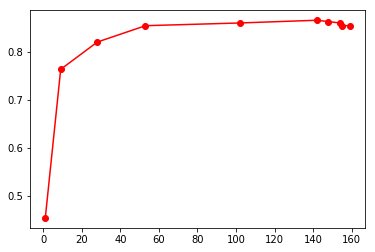

In [35]:
plt.plot(variables,accuracy,'ro-')

In [5]:
variables=[]
accuracy=[]
for c in [0.00001,0.0001,0.001,0.01,0.1,1,2,4,8,16]:
    model = LogisticRegression(penalty='l2',C=c)
    model.fit(df.iloc[0:1800,1:df.shape[1]-1], df.iloc[0:1800,df.shape[1]-1]) 
    score=model.score(df.iloc[1800:,1:df.shape[1]-1], df.iloc[1800:,df.shape[1]-1])
    accuracy.append(score)
    variables.append(np.count_nonzero(model.coef_))

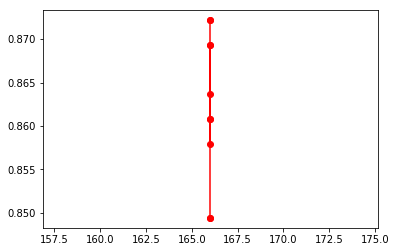

In [6]:
plt.plot(variables,accuracy,'ro-')

In [30]:
def logistic(df,method,reg):
    
    kf = KFold(n_splits=3, random_state=0)
    
    result = []
    
    for train, test in kf.split(df):
        
        train_data = df.iloc[train,:]
        test_data =  df.iloc[test,:]

        trainx = train_data.iloc[:,1:(train_data.shape[1]-1)]
        trainy = train_data.iloc[:,(train_data.shape[1]-1)]

        testx = test_data.iloc[:,1:test_data.shape[1]-1]
        testy = test_data.iloc[:,test_data.shape[1]-1]
        
        model = LogisticRegression(penalty=method,C=reg)
        model.fit(trainx, trainy) 
        result.append(model.score(testx, testy))
#         result.append([model.score(testx, testy),np.count_nonzero(model.coef_)])

    return result

In [19]:
accuracy=[]
variables=[]
for strength in [0.00001,0.0001,0.001,0.01,0.1,1,2,4,8,16]:
    res = logistic(df,method='l1',reg=strength)
    accuracy.append(np.average([x[0] for x in res]))
    variables.append(int(np.average([x[1] for x in res])))

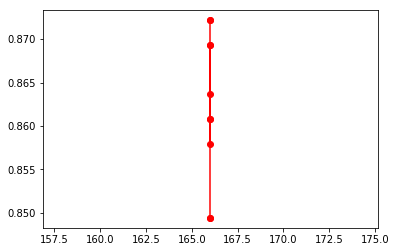

In [9]:
# fig = plt.plot(variables,accuracy,'ro-')
fig = plt.figure()
plt.plot(variables,accuracy,'ro-')

fig.savefig('feature_acc_reg.png', dpi=fig.dpi)

In [71]:
for strength in [0.00001,0.0001,0.001,0.01,0.1,1,2,4,8,16]:
    print(logistic(df,method='l1',reg=strength))

[0.5139275766016713, 0.499302649930265, 0.48675034867503486]
[0.5139275766016713, 0.499302649930265, 0.48675034867503486]
[0.5139275766016713, 0.499302649930265, 0.48675034867503486]
[0.7590529247910863, 0.7405857740585774, 0.7601115760111576]
[0.8398328690807799, 0.8284518828451883, 0.8577405857740585]
[0.8537604456824512, 0.8647140864714087, 0.8702928870292888]
[0.8426183844011143, 0.8633193863319386, 0.8688981868898187]
[0.8426183844011143, 0.8563458856345886, 0.8702928870292888]
[0.8454038997214485, 0.8535564853556485, 0.8647140864714087]
[0.8454038997214485, 0.8493723849372385, 0.8647140864714087]


In [31]:
np.average(logistic(df,method='l1',reg=0.01))

0.8406208681846494

In [12]:
features=df.columns[1:len(df.columns)-1]
def getFeatures(weights):
    df_w= pd.DataFrame(features)
    df_w.columns =['features']
    df_w['weight']=weights
    return df_w

In [13]:
df_weight = getFeatures(model.coef_[0])

df_weight.to_csv("regression.csv",index = False)

In [20]:
print (variables)

[1, 9, 24, 54, 97, 138, 147, 153, 157, 161]
